In [1]:
%pylab inline
import ROOT
import root_numpy
import pandas as pd
import glob
import os.path
import sys

Populating the interactive namespace from numpy and matplotlib


In [2]:
rcParams['figure.facecolor'] = (1,1,1,1)
from pyAmsUtils import *

In [3]:
filenames = sorted(glob.glob("/data/13*.root"), key=os.path.getmtime)[:-1]
#filenames = ["/root/AMSDeutons/test.root"]

In [4]:
def get_frame(f):
    tfile = ROOT.TFile(f)
    tree  = tfile.Get("selections")
    return tree_to_frame(tree) 

In [5]:
data = get_frame(filenames[8])
data['Mass'] = get_mass(data['R'], data['BetaTOF'])
for c,mx in [('R',20), ('Latitude',1), ('Mass',3)]:
    bins = np.linspace(0,mx,101)
    data[c+'_bin'] = pd.cut(data[c], bins=bins, labels=bins[:-1])

(0.5, 1)

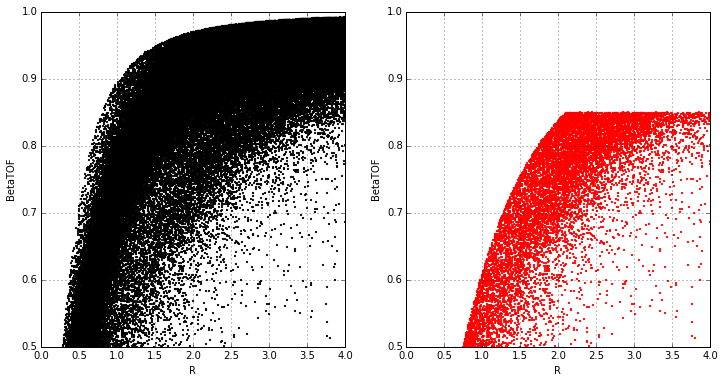

In [46]:
figsize(12,6)

idx   = data['R'] < 4
idx  &= data['Mass'] > 0.5
didx  = idx & (data['Mass'] > 1.3)
didx &= data['BetaTOF'] < 0.85

data[ idx].plot(kind='scatter', x='R', y='BetaTOF', color='k', marker='.', lw=0, ax=subplot(121))
xlim(0,4); ylim(0.5,1)
data[didx].plot(kind='scatter', x='R', y='BetaTOF', color='r', marker='.', lw=0, ax=subplot(122))
xlim(0,4);ylim(0.5,1)

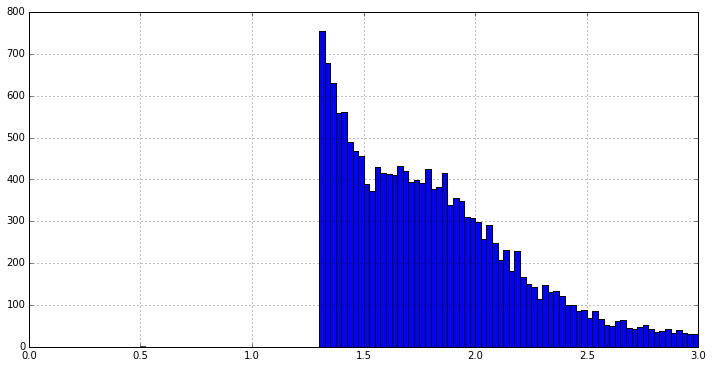

In [48]:
data[didx]['Mass'].hist(bins=np.linspace(0.5,3,101))

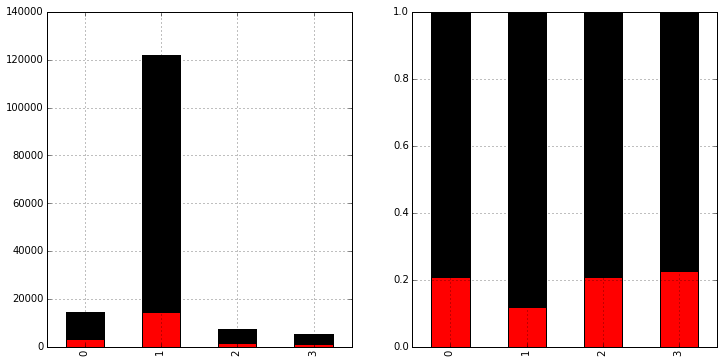

In [57]:
figsize(12,6)
def extract_ntrd(fStatus):
    return (fStatus >> 8) & 0b11
data['nTRD'] = data['fStatus'].map(extract_ntrd)
allC = data[ idx]['nTRD'].value_counts().sort_index()
deuC = data[didx]['nTRD'].value_counts().sort_index()
subplot(121)
allC.plot(kind='bar',color='k',ax=gca())
deuC.plot(kind='bar',color='r',ax=gca())
subplot(122)
(allC/allC).plot(kind='bar',color='k',ax=gca())
(deuC/allC).plot(kind='bar',color='r',ax=gca())




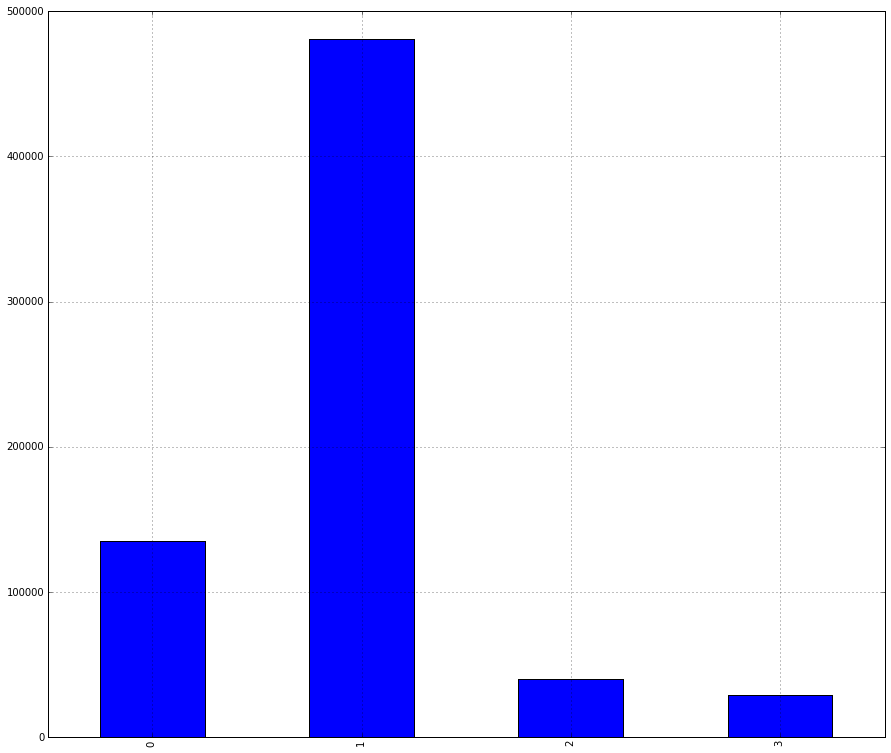

In [22]:
np.right_shift(np.bitwise_and(data['fStatus'], 0b1100000000),8).value_counts().sort_index().plot(kind='bar')

In [6]:
def get_frame(f):
    tfile = ROOT.TFile(f)
    tree  = tfile.Get("selections")
    return tree_to_frame(tree) 

p = Progress(80, len(filenames))
counts = {}
for i,f in enumerate(filenames):
    p.step(i)
    frame = get_frame(f)
    counts[f] = frame['PhysBPatt'].value_counts()
sys.stdout.write("\n")

--------------------------------------------------------------------------------
-------------------------------------------------------------------------------


In [7]:
pattcounts = pd.DataFrame(counts).sum(axis=1)
pattcounts.index = pattcounts.index.map(lambda x:np.binary_repr(x,8))

In [11]:
pattcounts['00000010']

63231362.0

# Counts (linear scale)

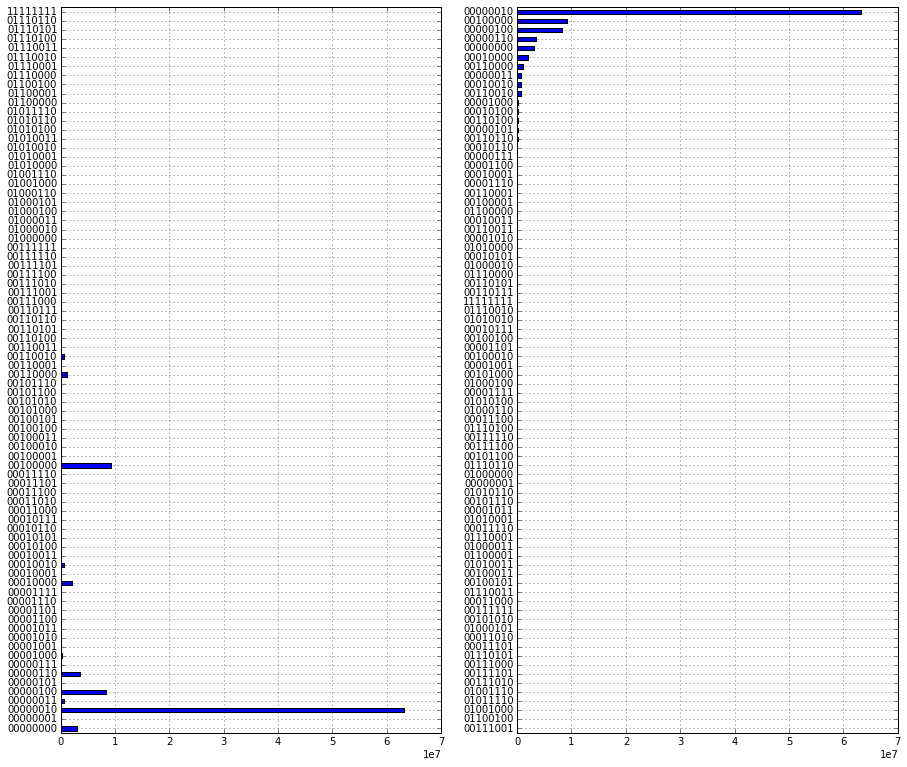

In [8]:
figsize(15,13)
subplot(121);pattcounts.sort_index().plot(kind='barh')
subplot(122);pattcounts.sort(ascending=True); pattcounts.plot(kind='barh')

#Counts (Log scale)

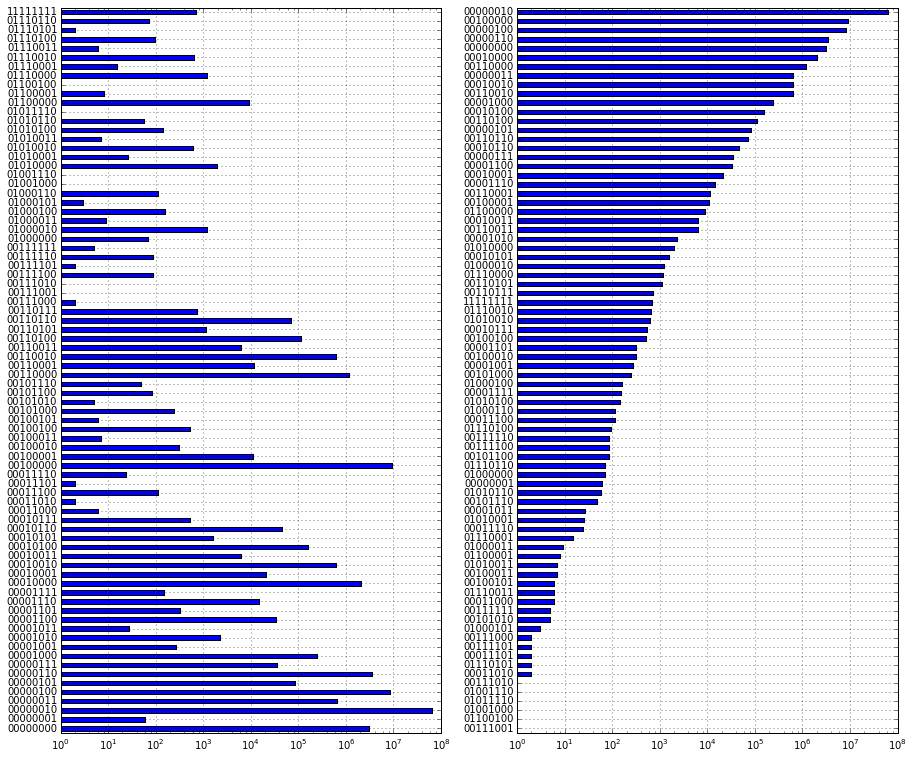

In [9]:
figsize(15,13)
subplot(121);pattcounts.sort_index().plot(kind='barh', logx=True)
subplot(122);pattcounts.sort(ascending=True); pattcounts.plot(kind='barh', logx=True)